## Importing Libraries

In [159]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

## Import the DataSet

In [160]:
train_tweets = pd.read_csv(r"D:\DataScience\Project\Analytics_Vidya\Identify the Sentiment\Dataset\train_2kmZucJ.csv")
test_tweets = pd.read_csv(r"D:\DataScience\Project\Analytics_Vidya\Identify the Sentiment\Dataset\test_oJQbWVk.csv")

## Exploratory Data Analysis


In [161]:
cols=['id','label','tweet']
train_tweets.columns=cols
train_tweets.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [162]:
train_tweets.isnull().sum()


id       0
label    0
tweet    0
dtype: int64

In [163]:
test_tweets.isnull().sum()

id       0
tweet    0
dtype: int64

In [164]:
train_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [165]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in train_tweets.columns:
    print('{} : {}'.format(col,train_tweets[col].unique()))

id : [   1    2    3 ... 7918 7919 7920]
label : [0 1]
tweet : ['#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'
 'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'
 'We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu'
 ...
 "Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!"
 'Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/'
 'Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/']


In [166]:
for col in train_tweets.columns:
    train_tweets[col].replace({'?':np.nan},inplace=True)


In [167]:
train_tweets.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [168]:
train_tweets.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [169]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
#using only v1 and v2 column
data= train_tweets [['id','label','tweet']]
data.head()

C:\Users\91890\AppData\Local\Temp\ipykernel_26680\1137875004.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [170]:
#checking the count of the dependent variable
data['tweet'].value_counts()

@architecture_3design - TAG YOUR FRIENDS @architecture_3design #design #contemporary #architecten #architect #arquitectura #iphone #mimar #mimarlık #araba #car #cars #instaarchitecture #concept #Architektur #architecture #luxury #archite… http://ift.tt    3
#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone                                                                                                                                1
Who wants ...?? #iphone #nespresso #lungo #simonlevelt #Coffee #best #red #cup #pijnenburgontbijtkoek #black youpic.twitter.com/eVUT2cUMzk                                                                                                                      1
#iPhone #5s #iphone5s is there and i it !! #apple #nice #fingerprint                                                                                                                                                              

## Steps to clean the data


## Punctuation Removal: 


In [171]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_msg']= data['tweet'].apply(lambda x:remove_punctuation(x))
data.head()

,id,label,tweet,clean_msg
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint Pregnancy Test httpsgooglh1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias… httpinstagramcompYGEt5JC6JM
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect httpfbme6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,Im wired I know Im George I was made that way iphone cute daventry home httpinstagrampLi5ujS4k
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple wont even talk to me about a question I have unless I pay them 1995 for their stupid support


## Lowering the text

In [172]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())


## Tokenization

In [173]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

## 3. Visualizing the missing values


<AxesSubplot: >

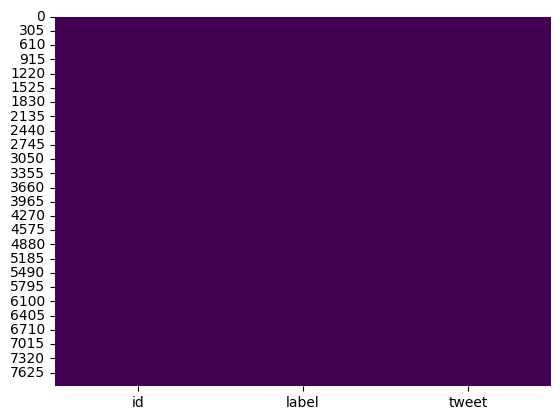

In [174]:
sns.heatmap(train_tweets.isnull(),cbar=False,cmap='viridis')


## Punctuations 

In [175]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

print(form_sentence(train_tweets['tweet'].iloc[10]))
print(train_tweets['tweet'].iloc[10])


hey apple when you make a new ipod dont make it a new color or 2inches thinner make it not crash every five fuckin minite
hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.


## NLP task the stopwords

In [176]:

def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
print(no_user_alpha(form_sentence(train_tweets['tweet'].iloc[10])))
print(train_tweets['tweet'].iloc[10])

['hey', 'apple', 'make', 'new', 'ipod', 'dont', 'make', 'new', 'color', 'thinner', 'make', 'crash', 'every', 'five', 'fuckin', 'minite']
hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.


## Lexicon Normalization

In [177]:

def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))

['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']


## Vectorization and Model Selection


In [178]:
# from sklearn.feature_extraction.text import CountVectorizer
vocab = ['awesome', 'terrible']
pipeline = Pipeline([
    ('bow',CountVectorizer(vocabulary=vocab)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Model Validation


In [179]:
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)

pipeline.fit(msg_train,label_train)

predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))


              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1582
           1       0.00      1.00      0.01         2

    accuracy                           0.74      1584
   macro avg       0.50      0.87      0.43      1584
weighted avg       1.00      0.74      0.85      1584

[[1172  410]
 [   0    2]]
0.7411616161616161


In [180]:
df = pd.DataFrame({'Actual': label_test, 'Predicted': predictions})
df

,Actual,Predicted
198,0,0
4286,0,0
6312,0,0
3078,0,0
4190,0,0
...,...,...
6205,0,0
3551,0,0
1569,0,0
1079,1,0


In [181]:
test_pred = pipeline.predict(msg_test)
test_pred[test_pred < 0] = 0
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [182]:
test_pred = pd.DataFrame(test_pred,columns =['label'])

In [183]:
test_pred.head()

,label
0,0
1,0
2,0
3,0
4,0


In [197]:
test_pred.apply(lambda x: x.fillna(x.value_counts().index[0]))

,label
0,0
1,0
2,0
3,0
4,0
...,...
1579,0
1580,0
1581,0
1582,0


In [185]:
test_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   1584 non-null   int64
dtypes: int64(1)
memory usage: 12.5 KB


In [186]:
submission=pd.read_csv(r"D:\DataScience\Project\Analytics_Vidya\Identify the Sentiment\Dataset\sample_submission_LnhVWA4.csv")

In [187]:
submission.head()

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0


In [188]:
predictions.shape

(1584,)

In [189]:
submission.shape

(1953, 2)

In [198]:
submission.apply(lambda x: x.fillna(x.value_counts().index[0]))

,id,label
0,7921,N
1,7922,N
2,7923,N
3,7924,N
4,7925,N
...,...,...
1948,9869,N
1949,9870,N
1950,9871,N
1951,9872,N


In [199]:
submission=submission.fillna(submission.mode().iloc[0])

In [200]:
submission.apply(lambda x: x.fillna(x.value_counts().index[0]))

,id,label
0,7921,N
1,7922,N
2,7923,N
3,7924,N
4,7925,N
...,...,...
1948,9869,N
1949,9870,N
1950,9871,N
1951,9872,N


In [193]:
submission['label']=test_pred 
submission['id']=test_tweets['id']

In [194]:
submission['label'].replace(0, 'N',inplace=True) 
submission['label'].replace(1, 'Y',inplace=True)

In [195]:
submission.to_csv("D:\DataScience\Project\Analytics_Vidya\Identify the Sentiment\Dataset\submission1.csv", index = False) # download the ourput in the colab 